# PCD - Labo 8
Lucas Charbonnier & Rémi Ançay

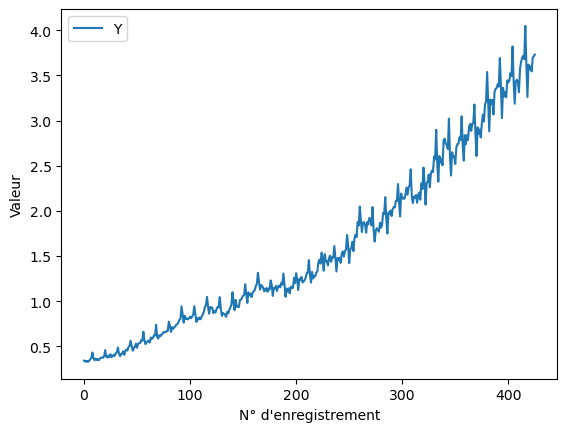

In [49]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

raw_data = pd.read_csv("data/auscafe.csv")
data = raw_data.drop(raw_data.columns[[0]], axis=1)
serie = np.asarray(data['Y'])

ax = data.plot()
ax.set_xlabel("N° d'enregistrement")
ax.set_ylabel("Valeur")

dataset_size = len(serie)
train_size = int(dataset_size * 0.8)
test_size = dataset_size - train_size

train = serie[:train_size]
test = serie[-test_size:]

In [50]:
# Returns the RMSE and MAPE of the predicted vs expected values
def get_rmse_and_mape(pred, expected):
    rmse = mean_squared_error(expected, pred, squared=False)
    mape = mean_absolute_percentage_error(expected, pred)
    return rmse, mape

# Plots the model results
def plot_model(train, test, fitted_values, pred, title):
    time_indices = np.arange(len(train) + len(test))

    plt.figure(figsize=(10,5))

    plt.plot(time_indices[:len(train)], train, label="Valeurs d'entraînement")
    plt.plot(time_indices[:len(train)], fitted_values, label="Valeurs lissées")
    plt.plot(time_indices[-len(test):], test, label="Valeurs de test")
    plt.plot(time_indices[-len(pred):], pred, label="Prédictions")

    plt.xlabel('Temps')
    plt.ylabel('Valeurs')
    plt.legend()
    plt.title(title)
    
    plt.show()

## Question 4

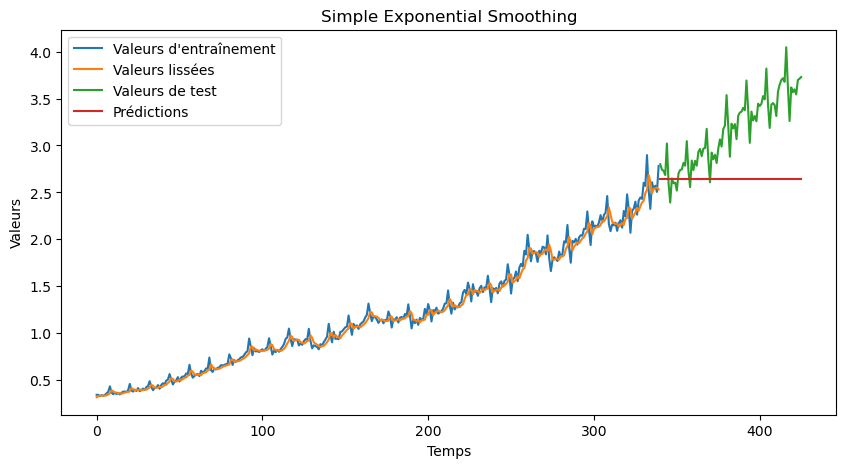

In [51]:
ses_model = SimpleExpSmoothing(train, initialization_method="heuristic").fit()

prediction = ses_model.forecast(test_size)
plot_model(train, test, ses_model.fittedvalues, prediction, "Simple Exponential Smoothing")

Model: Holt with exp=True & damped_trend=True, RMSE: 0.24410205582647906, MAPE: 0.05831172534367675
Model: Holt with exp=True & damped_trend=False, RMSE: 0.277722651378503, MAPE: 0.07341060723797674
Model: Holt with exp=False & damped_trend=True, RMSE: 0.2865241193154332, MAPE: 0.06783265691797068
Model: Holt with exp=False & damped_trend=False, RMSE: 0.32801563593851335, MAPE: 0.07835393203077849


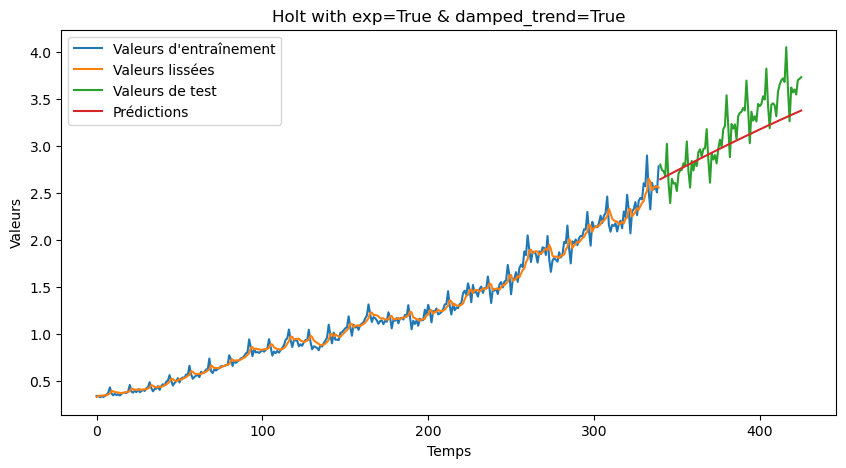

In [52]:
import itertools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

params_combinations = list(itertools.product(
    [True, False], # exponential
    [True, False], # damped_trend
))

models = list()
for exp, damped in params_combinations:
    desc = F"Holt with exp={exp} & damped_trend={damped}"

    model = Holt(endog=train, exponential=exp, damped_trend=damped, initialization_method="estimated").fit()
    prediction = model.forecast(test_size)
    rmse, mape = get_rmse_and_mape(prediction, test)

    #plot_model(train, test, model.fittedvalues, prediction, desc)
    
    models.append((desc, model, rmse, mape, prediction))

# Sort by RMSE
models.sort(key=lambda x: x[2])

# print results
for desc, model, rmse, mape, pred in models:
    print(F"Model: {desc}, RMSE: {rmse}, MAPE: {mape}")

# Plot model with best RMSE
plot_model(train, test, models[0][1].fittedvalues, models[0][4], models[0][0])


## Question 5

Le modèle avec les paramètres `exp = True` et `damped_trend = True` donne les meilleurs résultats (3ème graphique). C'est le modèle qui a les plus petites valeurs pour RMSE et MAPE. Cela se confirme visuellement, il prédit mieux la tendance que les autres modèles.

## Question 6

c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1366: RuntimeWarning: invalid value encountered in power
  + (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1370: RuntimeWarning: invalid value encountered in power
  betac * dampen(b[i - 1], phi)
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1374: RuntimeWarning: invalid value encountered in power
  - (gamma * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-pack

Model: trend=add, season=add, damped_trend=False, use_boxcox=False, RMSE: 0.10788203870729478, MAPE: 0.030322339160038427
Model: trend=add, season=add, damped_trend=True, use_boxcox=True, RMSE: 0.12198747510969139, MAPE: 0.03402858339234383
Model: trend=add, season=add, damped_trend=True, use_boxcox=False, RMSE: 0.12436314878811916, MAPE: 0.034895872156371355
Model: trend=add, season=add, damped_trend=False, use_boxcox=True, RMSE: 0.16028779482146946, MAPE: 0.04710493237503973
Model: trend=add, season=mul, damped_trend=False, use_boxcox=False, RMSE: 0.1756276999255559, MAPE: 0.05329247429745501
Model: trend=add, season=mul, damped_trend=True, use_boxcox=False, RMSE: 0.18960298600514575, MAPE: 0.05762554973266098
Model: trend=mul, season=mul, damped_trend=True, use_boxcox=False, RMSE: 0.19442270723691019, MAPE: 0.05950765189797224
Model: trend=mul, season=add, damped_trend=False, use_boxcox=False, RMSE: 0.3657643906618673, MAPE: 0.10174472716824123
Model: trend=mul, season=add, damped_t

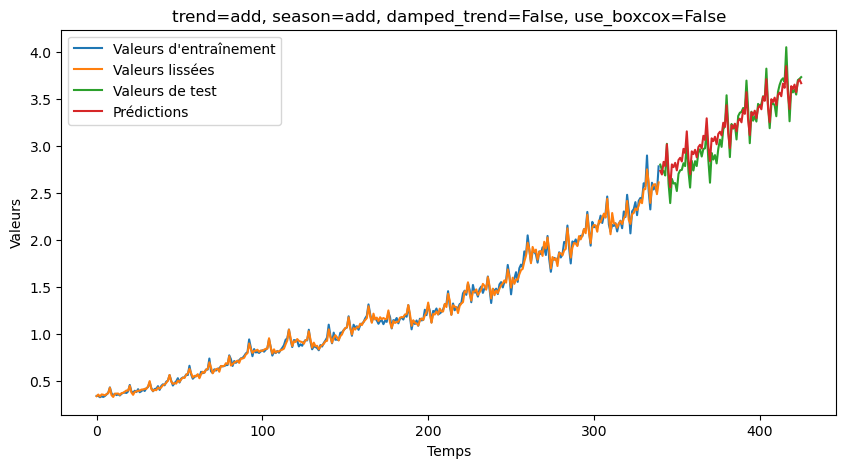

In [53]:
import itertools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt, Holt

params_combinations = list(itertools.product(
    ['add', 'mul'],  # trend
    ['add', 'mul'],  # seasonal
    [True, False],   # damped_trend
    [True, False]    # use_boxcox
))

models = list()
for trend, seasonal, damped_trend, use_boxcox in params_combinations:
    desc = f"trend={trend}, season={seasonal}, damped_trend={damped_trend}, use_boxcox={use_boxcox}"
    model = ExponentialSmoothing(initialization_method="estimated", endog=train, trend=trend, seasonal=seasonal, seasonal_periods=12, damped_trend=damped_trend, use_boxcox=use_boxcox).fit()
    prediction = model.forecast(test_size)

    # ignore model if it returns NaN predictions
    if not np.isnan(prediction).any():
        rmse, mape = get_rmse_and_mape(prediction, test)
        models.append((desc, model, rmse, mape, prediction))

# Sort by RMSE
models.sort(key=lambda x: x[2])

# print results
for desc, model, rmse, mape, pred in models:
    print(F"Model: {desc}, RMSE: {rmse}, MAPE: {mape}")

# Plot model with best RMSE
plot_model(train, test, models[0][1].fittedvalues, models[0][4], models[0][0])